## Data Visualization

In [45]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import plotly.figure_factory as ff
from matplotlib.collections import PatchCollection

In [2]:
# Read the shared mobility data csv
csvpath = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/merged_sharedmobility.csv")
df = pd.read_csv(csvpath, index_col=0, low_memory=False)

/Users/sheetalbongale/.local/share/virtualenvs/Python-Practice-Codes-ComU94dP/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



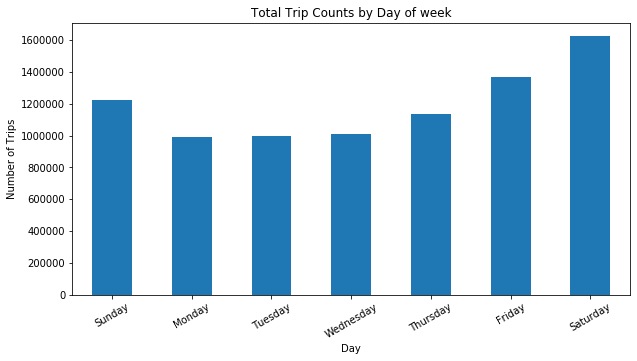

In [4]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df['Day Of Week'].value_counts().sort_index())

# Map day of week with actual names:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot glyph: 
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel("Number of Trips")
plt.savefig("Plots/trips_per_week.png")
plt.show()

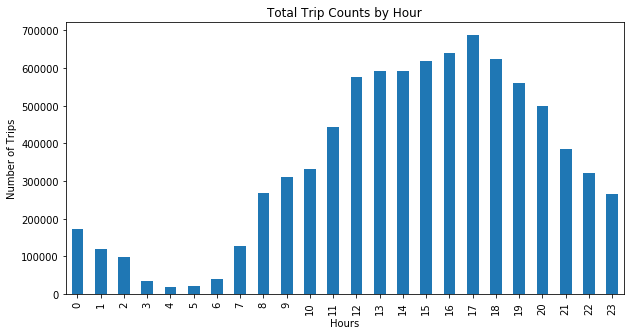

In [5]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(df['Hour'].value_counts().sort_index())
#hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20','21','22','23']
#hours = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']
#hourly_total['Hours'] = hours

hourly_total.reset_index().plot(kind='bar', x='index', y='Hour', title='Total Trip Counts by Hour', figsize = (10,5), legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_hour.png")
plt.show()
#now shows correct plot with sorted xticks

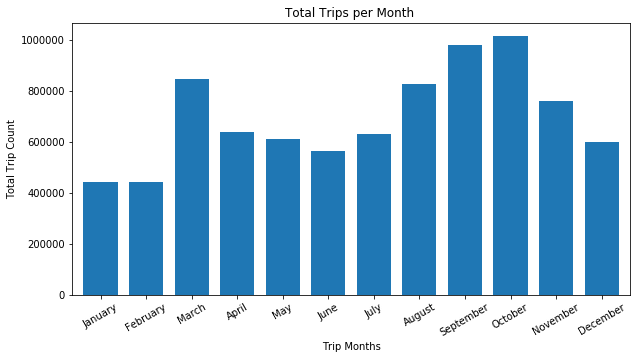

In [6]:
monthly_total = pd.DataFrame(df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",width = 0.75,figsize = (10,5),rot = 30, legend = False)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Trip Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("Plots/trips_per_month1.png")
plt.show()
#now shows correct plot with sorted months

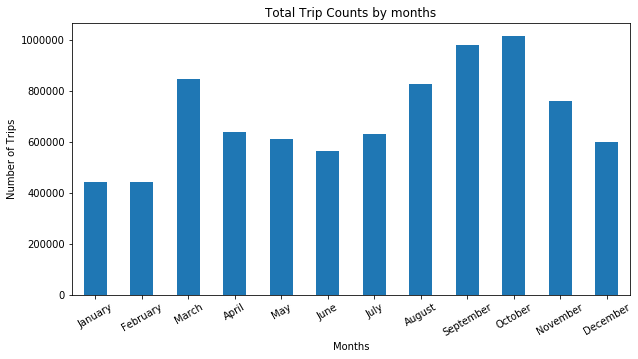

In [7]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total['Months'] = month_list
monthly_total.reset_index().plot(kind='bar', x='Months', y='Month', title='Total Trip Counts by months', figsize = (10,5), rot = 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_month2.png")
plt.show()
#now shows correct plot with sorted xticks

In [ ]:
# Count how many trips started in each census GEOID tract
census_trip_start = pd.DataFrame(df['Census GEOID Start'].value_counts().head(10))
census_trip_start

In [ ]:
# Count how many trips ended in each census tract
census_trip_end = pd.DataFrame(df['Census GEOID End'].value_counts())

In [ ]:
census_trip_start.reset_index().plot(kind='line', x='index', y = 'Census GEOID Start', figsize = (15,8))
plt.title("Total Count of trips starting per Census Tract")
plt.xlabel("GEOID ID")
plt.ylabel("Total Trips")
plt.savefig("Plots/trips_per_censustract.png")
plt.show()

In [50]:
census = gpd.read_file('/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/geo-pandas_censustract/tl_2010_48453_tract10.shp')
streets = gpd.read_file('/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/Street Centerline/geo_export_c8b73b25-2ed4-4cce-b27a-5b77fe19ba06.shp')
streets = streets.to_crs(census.crs)

/Users/sheetalbongale/.local/share/virtualenvs/Python-Practice-Codes-ComU94dP/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



In [51]:
from shapely.geometry import Point, LineString
def create_trips(x):
    trip = LineString([starting_point(x), end_point(x)])
    return trip

In [52]:
def create_trip2(x):
    start, end = x
    if start != 'OUT_OF_BOUNDS' and end != 'OUT_OF_BOUNDS':
        startpoint = census[census['TRACTCE10'] == str(int(start)).replace('48453', '')]['geometry'].iloc[0].centroid
        endpoint = census[census['TRACTCE10'] == str(int(end)).replace('48453', '')]['geometry'].iloc[0].centroid
        return LineString([startpoint, endpoint])
    else:
        return None

trip_data = df[['Census GEOID Start', 'Census GEOID End']].iloc[:10000]
trip_data['geometry'] = trip_data.apply(create_trip2, axis=1)
trip_data = gpd.GeoDataFrame(trip_data, crs=census.crs)

/Users/sheetalbongale/.local/share/virtualenvs/Python-Practice-Codes-ComU94dP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

Attempting to set identical left == right == -97.73804418135674 results in singular transformations; automatically expanding.

/Users/sheetalbongale/.local/share/virtualenvs/Python-Practice-Codes-ComU94dP/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Attempting to set identical bottom == top == 30.28741188360718 results in singular transformations; automatically expanding.



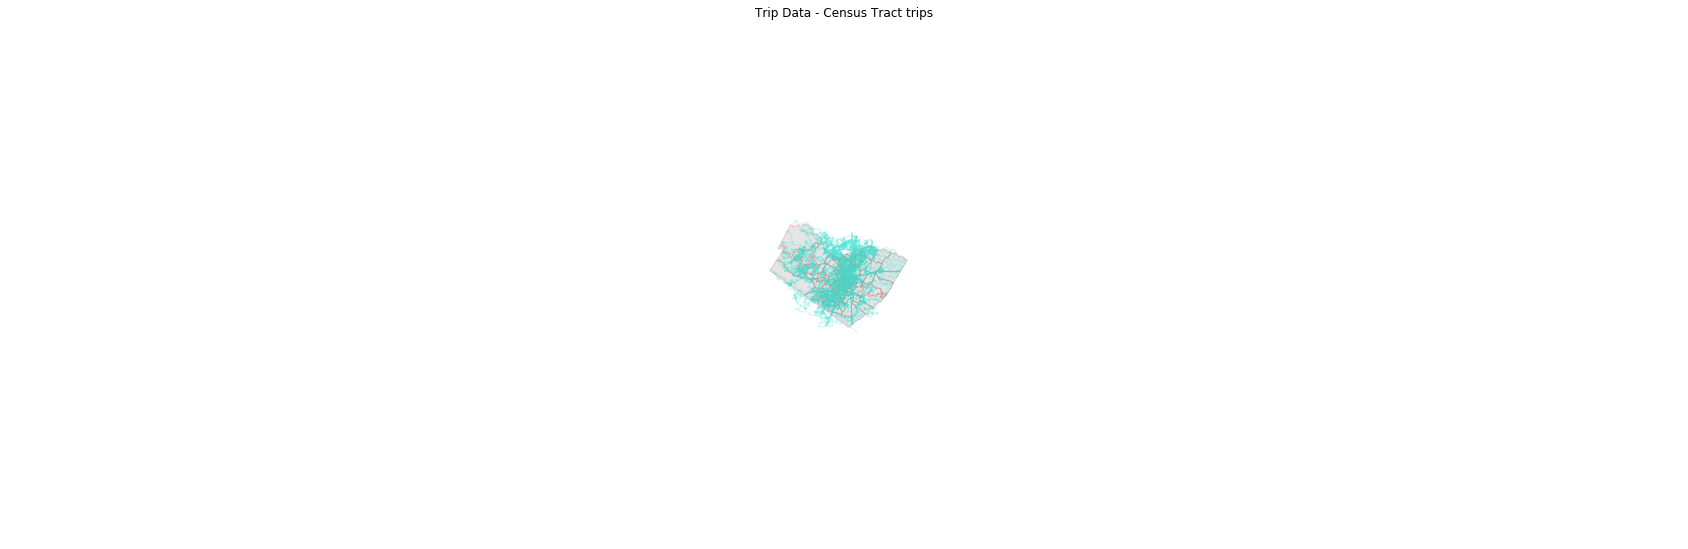

In [53]:
_, ax = plt.subplots(figsize=(30, 20))
_, _, maxx, maxy = trip_data.bounds.max()
minx, miny, _, _= trip_data.bounds.min()
census.plot(ax=ax, color='grey', edgecolor='red', alpha=0.2)
streets.plot(ax=ax, color='turquoise', alpha=0.2)
trip_data.plot(ax=ax, color='red', alpha=0.01)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.axis('off')
ax.set_title('Trip Data - Census Tract trips');